In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

"""
函数说明:读取数据
Parameters:
    fileName - 文件名
Returns:
    dataMat - 数据矩阵
    labelMat - 数据标签
"""
def loadDataSet(fileName):
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():                                     #逐行读取，滤除空格等
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])      #添加数据
        labelMat.append(float(lineArr[2]))                          #添加标签
    return dataMat,labelMat

"""
函数说明:数据可视化 
Parameters:
    dataMat - 数据矩阵
    labelMat - 数据标签
Returns:
    无
"""
def showDataSet(dataMat, labelMat):
    data_plus = []                                  #正样本
    data_minus = []                                 #负样本
    for i in range(len(dataMat)):
        if labelMat[i] > 0:
            data_plus.append(dataMat[i])
        else:
            data_minus.append(dataMat[i])
    data_plus_np = np.array(data_plus)              #转换为numpy矩阵
    data_minus_np = np.array(data_minus)            #转换为numpy矩阵
    plt.scatter(np.transpose(data_plus_np)[0], np.transpose(data_plus_np)[1])   #正样本散点图
    plt.scatter(np.transpose(data_minus_np)[0], np.transpose(data_minus_np)[1]) #负样本散点图
    plt.show()

[[3.542485, 1.977398], [3.018896, 2.556416], [7.55151, -1.58003], [2.114999, -0.004466], [8.127113, 1.274372], [7.108772, -0.986906], [8.610639, 2.046708], [2.326297, 0.265213], [3.634009, 1.730537], [0.341367, -0.894998], [3.125951, 0.293251], [2.123252, -0.783563], [0.887835, -2.797792], [7.139979, -2.329896], [1.696414, -1.212496], [8.117032, 0.623493], [8.497162, -0.266649], [4.658191, 3.507396], [8.197181, 1.545132], [1.208047, 0.2131], [1.928486, -0.32187], [2.175808, -0.014527], [7.886608, 0.461755], [3.223038, -0.552392], [3.628502, 2.190585], [7.40786, -0.121961], [7.286357, 0.251077], [2.301095, -0.533988], [-0.232542, -0.54769], [3.457096, -0.082216], [3.023938, -0.057392], [8.015003, 0.885325], [8.991748, 0.923154], [7.916831, -1.781735], [7.616862, -0.217958], [2.450939, 0.744967], [7.270337, -2.507834], [1.749721, -0.961902], [1.803111, -0.176349], [8.804461, 3.044301], [1.231257, -0.568573], [2.074915, 1.41055], [-0.743036, -1.736103], [3.536555, 3.96496], [8.410143, 0.0

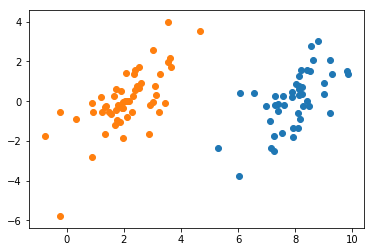

In [2]:
dataMat, labelMat = loadDataSet('testSet.txt')
print(dataMat, labelMat)
showDataSet(dataMat, labelMat)

In [3]:
from time import sleep
import matplotlib.pyplot as plt
import numpy as np
import random
import types

"""
函数说明:随机选择alpha
Parameters:
    i - alpha
    m - alpha参数个数
Returns:
    j -
"""
def selectJrand(i, m):
    j = i                                 #选择一个不等于i的j
    while (j == i):
        j = int(random.uniform(0, m))
    return j
 
"""
函数说明:修剪alpha
Parameters:
    aj - alpha值
    H - alpha上限
    L - alpha下限
Returns:
    aj - alpah值
"""
def clipAlpha(aj,H,L):
    if aj > H:
        aj = H
    if L > aj:
        aj = L
    return aj

"""
函数说明:简化版SMO算法
Parameters:
    dataMatIn - 数据矩阵
    classLabels - 数据标签
    C - 惩罚参数
    toler - 松弛变量
    maxIter - 最大迭代次数
Returns:
    无
"""
def smoSimple(dataMatIn, classLabels, C, toler, maxIter):
    #转换为numpy的mat存储
    dataMatrix = np.mat(dataMatIn); labelMat = np.mat(classLabels).transpose()
    #初始化b参数，统计dataMatrix的维度
    b = 0; m,n = np.shape(dataMatrix)
    #初始化alpha参数，设为0
    alphas = np.mat(np.zeros((m,1)))
    #初始化迭代次数
    iter_num = 0
    #最多迭代matIter次
    while (iter_num < maxIter):
        alphaPairsChanged = 0
        for i in range(m):
            #步骤1：计算误差Ei
            fXi = float(np.multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[i,:].T)) + b
            Ei = fXi - float(labelMat[i])
            #优化alpha，更设定一定的容错率。
            if ((labelMat[i]*Ei < -toler) and (alphas[i] < C)) or ((labelMat[i]*Ei > toler) and (alphas[i] > 0)):
                #随机选择另一个与alpha_i成对优化的alpha_j
                j = selectJrand(i,m)
                #步骤1：计算误差Ej
                fXj = float(np.multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[j,:].T)) + b
                Ej = fXj - float(labelMat[j])
                #保存更新前的aplpha值，使用深拷贝
                alphaIold = alphas[i].copy(); alphaJold = alphas[j].copy();
                #步骤2：计算上下界L和H
                if (labelMat[i] != labelMat[j]):
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else:
                    L = max(0, alphas[j] + alphas[i] - C)
                    H = min(C, alphas[j] + alphas[i])
                if L==H: print("L==H"); continue
                #步骤3：计算eta
                eta = 2.0 * dataMatrix[i,:]*dataMatrix[j,:].T - dataMatrix[i,:]*dataMatrix[i,:].T - dataMatrix[j,:]*dataMatrix[j,:].T
                if eta >= 0: print("eta>=0"); continue
                #步骤4：更新alpha_j
                alphas[j] -= labelMat[j]*(Ei - Ej)/eta
                #步骤5：修剪alpha_j
                alphas[j] = clipAlpha(alphas[j],H,L)
                if (abs(alphas[j] - alphaJold) < 0.00001): print("alpha_j变化太小"); continue
                #步骤6：更新alpha_i
                alphas[i] += labelMat[j]*labelMat[i]*(alphaJold - alphas[j])
                #步骤7：更新b_1和b_2
                b1 = b - Ei- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[i,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[i,:]*dataMatrix[j,:].T
                b2 = b - Ej- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[j,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[j,:]*dataMatrix[j,:].T
                #步骤8：根据b_1和b_2更新b
                if (0 < alphas[i]) and (C > alphas[i]): b = b1
                elif (0 < alphas[j]) and (C > alphas[j]): b = b2
                else: b = (b1 + b2)/2.0
                #统计优化次数
                alphaPairsChanged += 1
                #打印统计信息
                print("第%d次迭代 样本:%d, alpha优化次数:%d" % (iter_num,i,alphaPairsChanged))
        #更新迭代次数
        if (alphaPairsChanged == 0): iter_num += 1
        else: iter_num = 0
        print("迭代次数: %d" % iter_num)
    return b,alphas
 
"""
函数说明:分类结果可视化
Parameters:
    dataMat - 数据矩阵
    w - 直线法向量
    b - 直线解决
Returns:
    无
"""
def showClassifer(dataMat, w, b):
    #绘制样本点
    data_plus = []                                  #正样本
    data_minus = []                                 #负样本
    for i in range(len(dataMat)):
        if labelMat[i] > 0:
            data_plus.append(dataMat[i])
        else:
            data_minus.append(dataMat[i])
    data_plus_np = np.array(data_plus)              #转换为numpy矩阵
    data_minus_np = np.array(data_minus)            #转换为numpy矩阵
    plt.scatter(np.transpose(data_plus_np)[0], np.transpose(data_plus_np)[1], s=30, alpha=0.7)   #正样本散点图
    plt.scatter(np.transpose(data_minus_np)[0], np.transpose(data_minus_np)[1], s=30, alpha=0.7) #负样本散点图
    #绘制直线
    x1 = max(dataMat)[0]
    x2 = min(dataMat)[0]
    a1, a2 = w
    b = float(b)
    a1 = float(a1[0])
    a2 = float(a2[0])
    y1, y2 = (-b- a1*x1)/a2, (-b - a1*x2)/a2
    plt.plot([x1, x2], [y1, y2])
    #找出支持向量点
    for i, alpha in enumerate(alphas):
        if alpha > 0:
            x, y = dataMat[i]
            plt.scatter([x], [y], s=150, c='none', alpha=0.7, linewidth=1.5, edgecolor='red')
    plt.show()
"""
函数说明:计算w
Parameters:
    dataMat - 数据矩阵
    labelMat - 数据标签
    alphas - alphas值
Returns:
    无
"""
def get_w(dataMat, labelMat, alphas):
    alphas, dataMat, labelMat = np.array(alphas), np.array(dataMat), np.array(labelMat)
    w = np.dot((np.tile(labelMat.reshape(1, -1).T, (1, 2)) * dataMat).T, alphas)
    return w.tolist()

第0次迭代 样本:0, alpha优化次数:1
alpha_j变化太小
L==H
L==H
L==H
第0次迭代 样本:6, alpha优化次数:2
第0次迭代 样本:8, alpha优化次数:3
alpha_j变化太小
alpha_j变化太小
L==H
第0次迭代 样本:17, alpha优化次数:4
第0次迭代 样本:18, alpha优化次数:5
alpha_j变化太小
L==H
L==H
第0次迭代 样本:29, alpha优化次数:6
L==H
alpha_j变化太小
alpha_j变化太小
第0次迭代 样本:92, alpha优化次数:7
迭代次数: 0
第0次迭代 样本:0, alpha优化次数:1
第0次迭代 样本:6, alpha优化次数:2
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
L==H
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
L==H
alpha_j变化太小
第0次迭代 样本:31, alpha优化次数:3
alpha_j变化太小
L==H
L==H
alpha_j变化太小
alpha_j变化太小
L==H
第0次迭代 样本:52, alpha优化次数:4
第0次迭代 样本:54, alpha优化次数:5
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
L==H
迭代次数: 0
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
第0次迭代 样本:11, alpha优化次数:1
第0次迭代 样本:17, alpha优化次数:2
第0次迭代 样本:18, alpha优化次数:3
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
L==H
alpha_j变化太小
alpha_j变化太小
第0次迭代 样本:71, alpha优化次数:4
alpha_j变化太小
迭代次数: 0
alpha_j变化太小
第0次迭代 样本:5, alpha优化次数:1
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j

迭代次数: 12
alpha_j变化太小
alpha_j变化太小
迭代次数: 13
alpha_j变化太小
alpha_j变化太小
迭代次数: 14
alpha_j变化太小
alpha_j变化太小
迭代次数: 15
alpha_j变化太小
alpha_j变化太小
迭代次数: 16
alpha_j变化太小
alpha_j变化太小
迭代次数: 17
alpha_j变化太小
alpha_j变化太小
迭代次数: 18
alpha_j变化太小
alpha_j变化太小
迭代次数: 19
alpha_j变化太小
alpha_j变化太小
迭代次数: 20
alpha_j变化太小
alpha_j变化太小
迭代次数: 21
alpha_j变化太小
alpha_j变化太小
迭代次数: 22
alpha_j变化太小
alpha_j变化太小
迭代次数: 23
alpha_j变化太小
alpha_j变化太小
迭代次数: 24
alpha_j变化太小
第24次迭代 样本:54, alpha优化次数:1
alpha_j变化太小
迭代次数: 0
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 1
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 2
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 3
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 4
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 5
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 6
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 7
alpha_j变化太小
alpha_j变化太小
第7次迭代 样本:55, alpha优化次数:1
迭代次数: 0
alpha_j变化太小
迭代次数: 1
alpha_j变化太小
迭代次数: 2
alpha_j变化太小
迭代次数: 3
alpha_j变化太小
迭代次数: 4
alpha_j变化太小
迭代次数: 5
alpha_j变化太小
迭代次数: 6
alpha_j变化太小
迭代次数: 7
alpha_j变化太小
迭代次数: 8
alpha_j变化太小


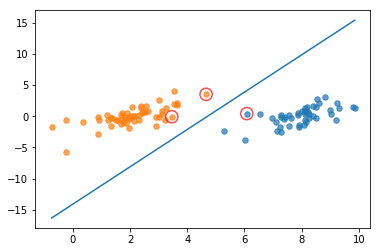

In [4]:
dataMat, labelMat = loadDataSet('testSet.txt')
b,alphas = smoSimple(dataMat, labelMat, 0.6, 0.001, 40)
w = get_w(dataMat, labelMat, alphas)
showClassifer(dataMat, w, b)